In [2]:
from pyEDM import *
import matplotlib.pyplot as plt


# https://sugiharalab.github.io/EDM_Documentation/basic_examples/

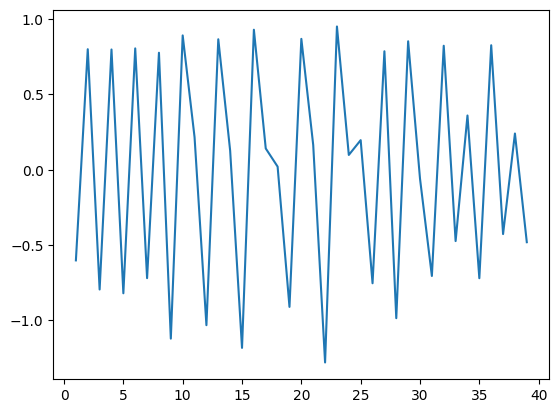

In [3]:
tentmap = sampleData['TentMap']
tentmapNoise = sampleData['TentMapNoise']

plt.plot(tentmap['TentMap'][1:40]);

### Evaluate optimal embedding dimension w/ Simplex methodology

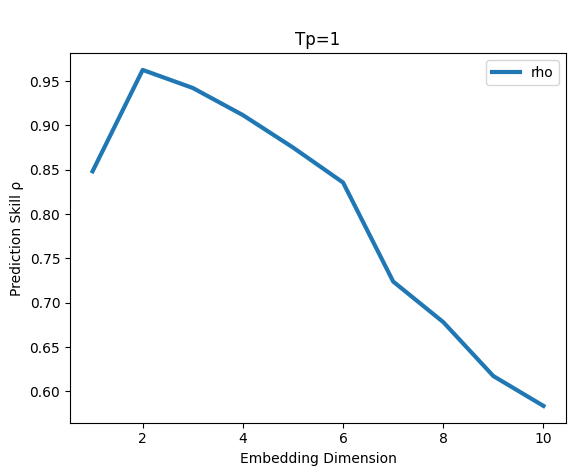

In [4]:
EmbedDimension(dataFrame=tentmap, lib="1 100", pred="201 500",
               columns="TentMap");


### Evaluate nonlinearity

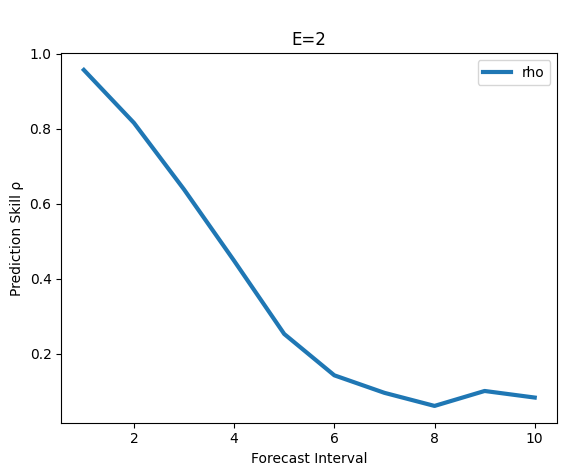

In [5]:
PredictInterval(dataFrame=tentmap, lib="1 100", pred="251 500",
                columns="TentMap", E=2);

# Simplex prediction

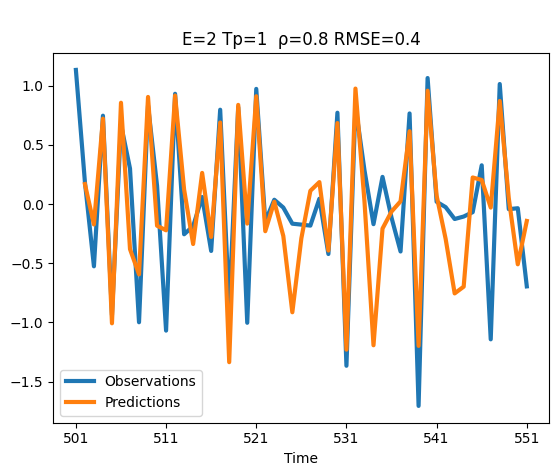

In [6]:
Simplex(dataFrame=tentmapNoise, lib="1 500", pred="501 550",
        columns="TentMap", E=2, showPlot=True);

# Simplex prediction using mulitvariate embedding

In [7]:
block_3sp = sampleData['block_3sp']
block_3sp.head(3)

,time,x_t,x_t-1,x_t-2,y_t,y_t-1,y_t-2,z_t,z_t-1,z_t-2
0,3,-1.917685,1.244882,-0.741863,-0.113188,1.488887,-1.268104,1.535239,-0.481583,-1.863980
1,4,-0.962318,-1.917685,1.244882,-1.106779,-0.113188,1.488887,-1.492956,1.535239,-0.481583
2,5,1.331875,-0.962318,-1.917685,2.385041,-1.106779,-0.113188,-1.119476,-1.492956,1.535239


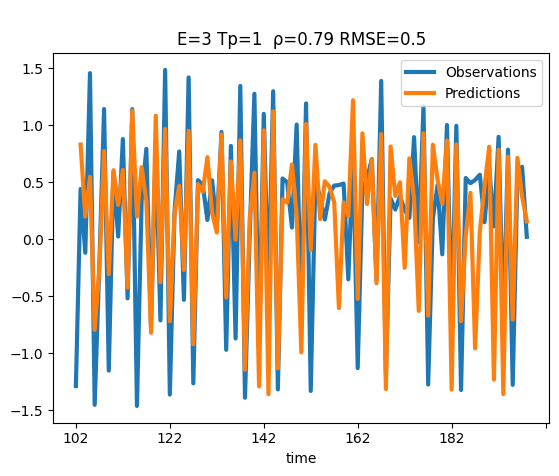

In [11]:
# embedded = True
Simplex( dataFrame = block_3sp, lib = "1 99", pred = "100 195",
         E = 3, columns = "x_t y_t z_t", target = "x_t",
         embedded = True, showPlot = True );


# Evaluate optimal SMap theta parameter indicating state-dependence and extent of nonlinearity

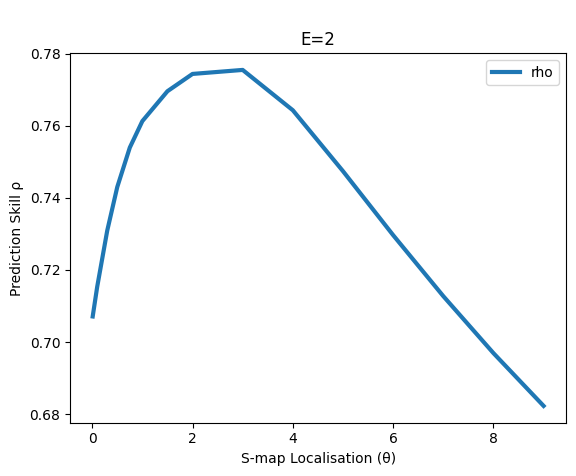

In [9]:
PredictNonlinear( dataFrame = tentmapNoise, lib = "1 100", pred = "201 500",
                  columns = "TentMap", E = 2 );

SMap theta parameter in the range of [2-3] provides optimal resolution. The non-zero theta peak of predictability indicates nonlinearity.

# SMap Prediction

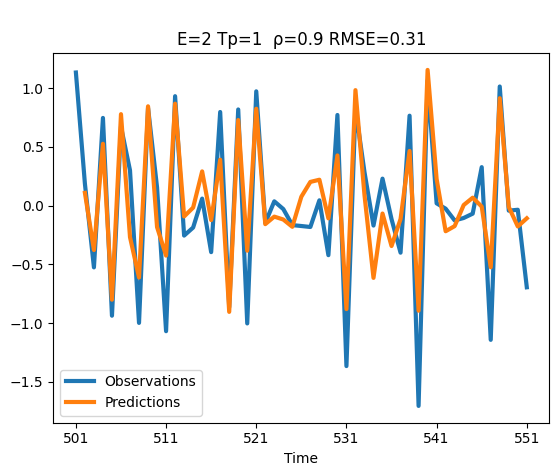

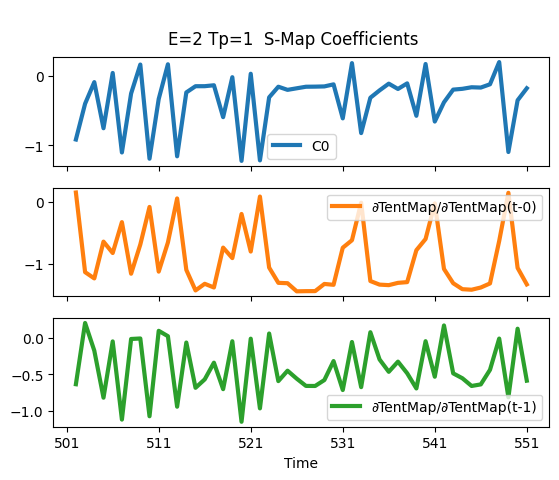

In [10]:
SMap( dataFrame = tentmapNoise, lib = "1 500", pred = "501 550",
      columns = "TentMap", E = 2, theta = 3, showPlot = True );

# SMap Prediction multivariate embedding

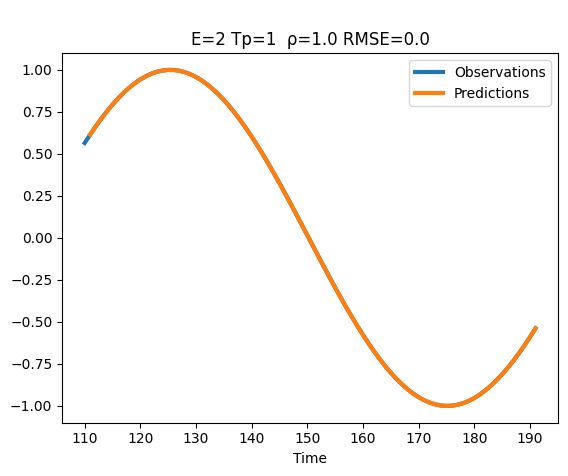

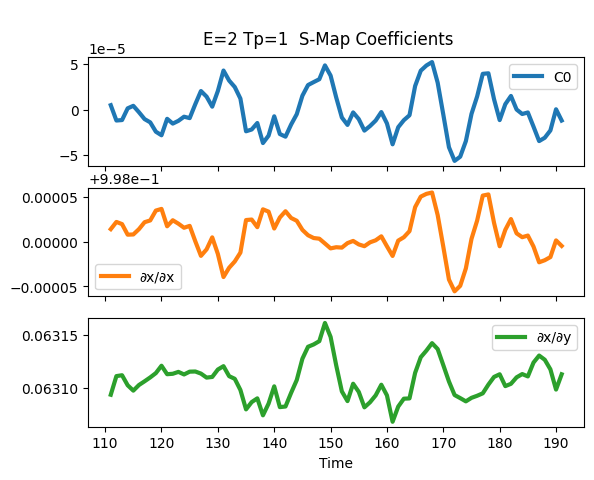

In [13]:
# embedded = True
SMap( dataFrame = sampleData[ 'circle' ],
      lib = "1 100", pred = "110 190", theta = 4, E = 2,
      embedded = True, columns = "x y", target = "x", showPlot = True );

# Inference of causality via Convergent Cross Mapping (CCM)

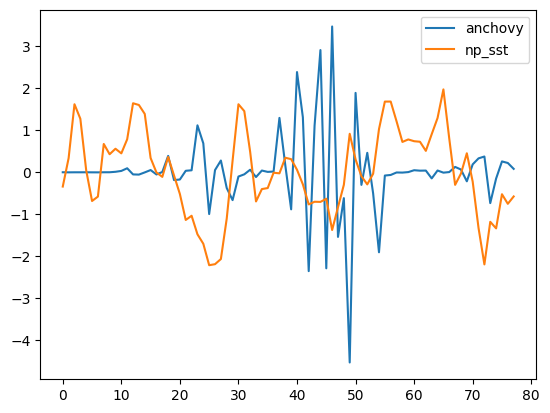

In [14]:
sardine_anchovy_sst = sampleData['sardine_anchovy_sst']
sardine_anchovy_sst[['anchovy','np_sst']].plot();

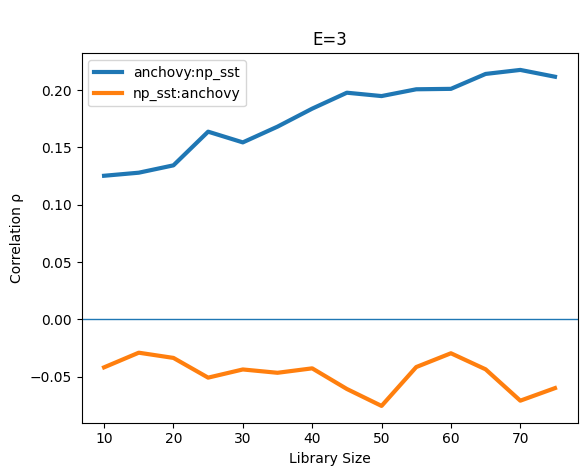

In [15]:
CCM( dataFrame = sardine_anchovy_sst, E = 3,
     columns = "anchovy", target = "np_sst",
     libSizes = "10 75 5", sample = 100, showPlot = True );

# Multiview Embedding

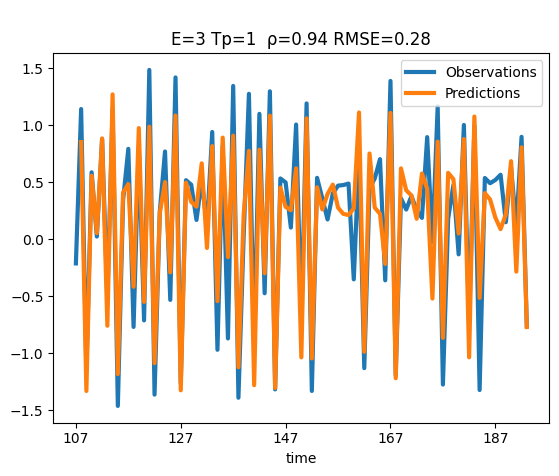

In [16]:
MV = Multiview( dataFrame = block_3sp, lib = "1 99", pred = "105 190", E = 3,
                columns = "x_t y_t z_t", target = "x_t", showPlot = True );

In [17]:
MV['View']
# Col_i are column indices in block_3sp

,Col_1,Col_2,Col_3,rho,MAE,RMSE,name_1,name_2,name_3
0,1.0,2.0,7.0,0.920810,0.248512,0.316416,x_t(t-0),x_t(t-1),z_t(t-0)
1,1.0,2.0,6.0,0.867700,0.329428,0.411275,x_t(t-0),x_t(t-1),y_t(t-2)
2,1.0,2.0,3.0,0.931867,0.227694,0.293402,x_t(t-0),x_t(t-1),x_t(t-2)
3,1.0,2.0,8.0,0.918331,0.247643,0.320505,x_t(t-0),x_t(t-1),z_t(t-1)
4,1.0,7.0,9.0,0.885830,0.303054,0.373766,x_t(t-0),z_t(t-0),z_t(t-2)
5,1.0,4.0,9.0,0.777399,0.419085,0.511584,x_t(t-0),y_t(t-0),z_t(t-2)
6,1.0,3.0,7.0,0.872370,0.315571,0.400680,x_t(t-0),x_t(t-2),z_t(t-0)
7,1.0,2.0,5.0,0.901727,0.280353,0.356719,x_t(t-0),x_t(t-1),y_t(t-1)
8,1.0,2.0,4.0,0.880479,0.294107,0.386308,x_t(t-0),x_t(t-1),y_t(t-0)
